# Text Summarizer

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

import re
import heapq
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dhira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dhira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
content = """Artificial Intelligence (AI) is transforming workplaces across industries, bringing both opportunities and challenges. Companies are increasingly adopting AI-driven tools to automate repetitive tasks, enhance decision-making, and improve efficiency. For example, chatbots powered by AI handle customer inquiries 24/7, while machine learning algorithms analyze vast datasets to provide actionable insights. These advancements enable businesses to save time and reduce costs while delivering better services to their customers.

However, the rise of AI also raises concerns about job displacement. Many routine jobs are being automated, leading to fears of unemployment in certain sectors. At the same time, AI is creating new opportunities by generating demand for skills in data science, machine learning, and AI ethics. Workers are now encouraged to upskill and adapt to the changing landscape to remain relevant in their professions.

Another significant aspect of AI in the workplace is its impact on decision-making. AI tools are not only faster but often more accurate than human judgment in analyzing data and identifying patterns. For instance, AI can predict market trends, optimize supply chains, and personalize marketing strategies. However, organizations must ensure that these systems are free of biases and operate transparently, as ethical concerns regarding AI's role in decision-making continue to grow.

In conclusion, AI is revolutionizing modern workplaces by driving efficiency and creating opportunities for innovation. While challenges such as job displacement and ethical issues need to be addressed, the benefits of AI are undeniable. By embracing AI responsibly and fostering a culture of continuous learning, organizations and employees can thrive in an AI-driven world."""

In [7]:
text = content
text = re.sub(r'\[[0-9]*\]',' ',text)
text = re.sub(r'\s+',' ',text)

In [8]:
print(text)

Artificial Intelligence (AI) is transforming workplaces across industries, bringing both opportunities and challenges. Companies are increasingly adopting AI-driven tools to automate repetitive tasks, enhance decision-making, and improve efficiency. For example, chatbots powered by AI handle customer inquiries 24/7, while machine learning algorithms analyze vast datasets to provide actionable insights. These advancements enable businesses to save time and reduce costs while delivering better services to their customers. However, the rise of AI also raises concerns about job displacement. Many routine jobs are being automated, leading to fears of unemployment in certain sectors. At the same time, AI is creating new opportunities by generating demand for skills in data science, machine learning, and AI ethics. Workers are now encouraged to upskill and adapt to the changing landscape to remain relevant in their professions. Another significant aspect of AI in the workplace is its impact o

In [10]:
cln_text = text.lower()
patterns = [r'\W',r'\d',r'\s+']
for regex in patterns:
    cln_text = re.sub(regex,' ',cln_text)

print(cln_text)

artificial intelligence ai is transforming workplaces across industries bringing both opportunities and challenges companies are increasingly adopting ai driven tools to automate repetitive tasks enhance decision making and improve efficiency for example chatbots powered by ai handle customer inquiries while machine learning algorithms analyze vast datasets to provide actionable insights these advancements enable businesses to save time and reduce costs while delivering better services to their customers however the rise of ai also raises concerns about job displacement many routine jobs are being automated leading to fears of unemployment in certain sectors at the same time ai is creating new opportunities by generating demand for skills in data science machine learning and ai ethics workers are now encouraged to upskill and adapt to the changing landscape to remain relevant in their professions another significant aspect of ai in the workplace is its impact on decision making ai tool

In [11]:
sentences = nltk.sent_tokenize(text)
print(sentences)

['Artificial Intelligence (AI) is transforming workplaces across industries, bringing both opportunities and challenges.', 'Companies are increasingly adopting AI-driven tools to automate repetitive tasks, enhance decision-making, and improve efficiency.', 'For example, chatbots powered by AI handle customer inquiries 24/7, while machine learning algorithms analyze vast datasets to provide actionable insights.', 'These advancements enable businesses to save time and reduce costs while delivering better services to their customers.', 'However, the rise of AI also raises concerns about job displacement.', 'Many routine jobs are being automated, leading to fears of unemployment in certain sectors.', 'At the same time, AI is creating new opportunities by generating demand for skills in data science, machine learning, and AI ethics.', 'Workers are now encouraged to upskill and adapt to the changing landscape to remain relevant in their professions.', 'Another significant aspect of AI in the

In [12]:
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
word_count = {}
for word in nltk.word_tokenize(cln_text):
    if word not in stop_words:
        if word not in word_count.keys():
            word_count[word] = 1
        else:
            word_count[word] += 1

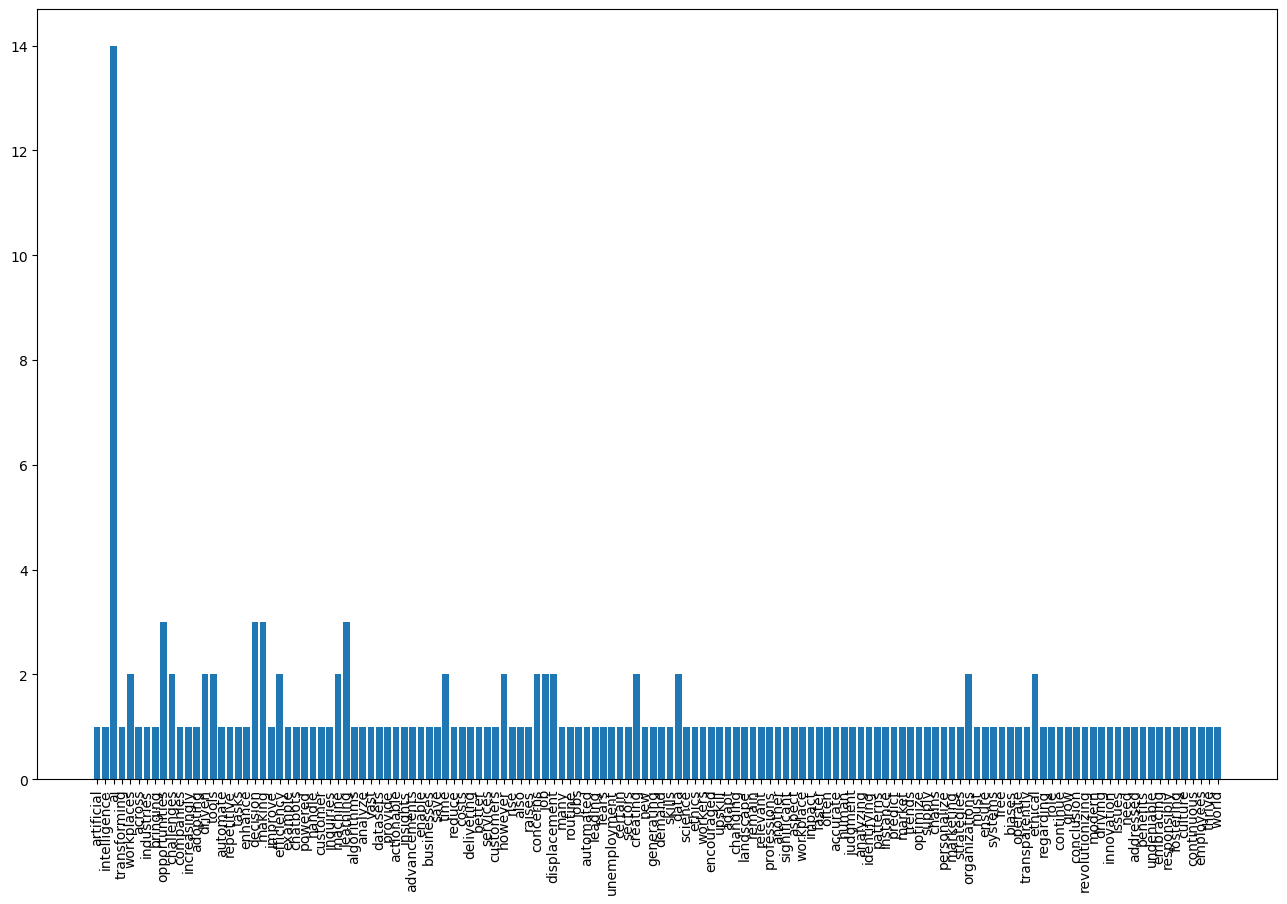

In [14]:
plt.figure(figsize=(16,10))
plt.xticks(rotation = 90)
plt.bar(word_count.keys(), word_count.values())
plt.show()

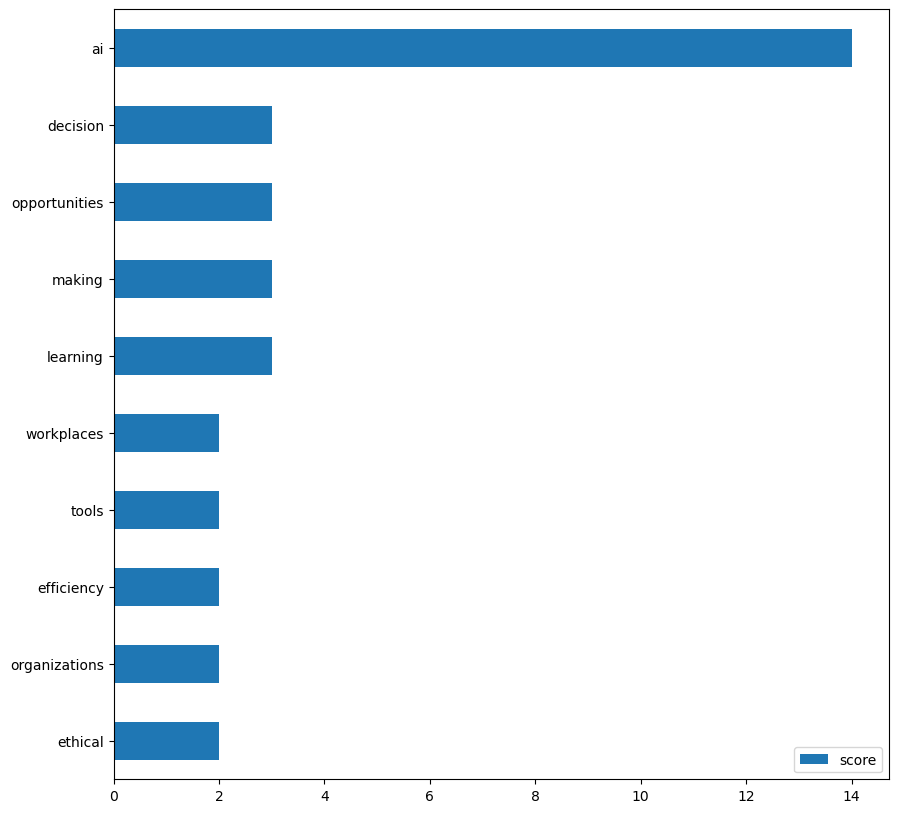

In [ ]:
word_count_table = pd.DataFrame.from_dict(word_count, orient = 'index').rename(columns={0: 'score'})
word_count_table.sort_values(by='score').tail(25).plot(kind='barh', figsize=(10,10))
plt.show()

In [19]:
# Ranking Sentence
sentence_scores = {}
for sentence in sentences:
    for word in nltk.word_tokenize(sentence.lower()):
        if word in word_count.keys():
            if len(sentence.split(' ')) < 30:
                if sentence not in sentence_scores.keys():
                    sentence_scores[sentence] = word_count[word]
                else:
                    sentence_scores[sentence] += word_count[word]

In [36]:
sentence_score = pd.DataFrame.from_dict(sentence_scores, orient = 'index').rename(columns={0: 'score'})
sentence_score.sort_values(by='score', ascending = False)

                                                    score
Artificial Intelligence (AI) is transforming wo...     27
Companies are increasingly adopting AI-driven t...     12
For example, chatbots powered by AI handle cust...     32
These advancements enable businesses to save ti...     12
However, the rise of AI also raises concerns ab...     25
Many routine jobs are being automated, leading ...      9
At the same time, AI is creating new opportunit...     48
Workers are now encouraged to upskill and adapt...      9
Another significant aspect of AI in the workpla...     19
AI tools are not only faster but often more acc...     26
For instance, AI can predict market trends, opt...     24
However, organizations must ensure that these s...     33
In conclusion, AI is revolutionizing modern wor...     28
While challenges such as job displacement and e...     27
By embracing AI responsibly and fostering a cul...     27


,score
"At the same time, AI is creating new opportunities by generating demand for skills in data science, machine learning, and AI ethics.",48
"However, organizations must ensure that these systems are free of biases and operate transparently, as ethical concerns regarding AI's role in decision-making continue to grow.",33
"For example, chatbots powered by AI handle customer inquiries 24/7, while machine learning algorithms analyze vast datasets to provide actionable insights.",32
"In conclusion, AI is revolutionizing modern workplaces by driving efficiency and creating opportunities for innovation.",28
"Artificial Intelligence (AI) is transforming workplaces across industries, bringing both opportunities and challenges.",27
"While challenges such as job displacement and ethical issues need to be addressed, the benefits of AI are undeniable.",27
"By embracing AI responsibly and fostering a culture of continuous learning, organizations and employees can thrive in an AI-driven world.",27
AI tools are not only faster but often more accurate than human judgment in analyzing data and identifying patterns.,26
"However, the rise of AI also raises concerns about job displacement.",25
"For instance, AI can predict market trends, optimize supply chains, and personalize marketing strategies.",24


In [41]:
best_sentences = heapq.nlargest(10, sentence_scores, key=sentence_scores.get)

In [47]:
summary = """Summary
\n--------\n""" 
for s in sentences:
    if s in best_sentences:
        summary += s
print(summary)


Summary

--------
Artificial Intelligence (AI) is transforming workplaces across industries, bringing both opportunities and challenges.For example, chatbots powered by AI handle customer inquiries 24/7, while machine learning algorithms analyze vast datasets to provide actionable insights.However, the rise of AI also raises concerns about job displacement.At the same time, AI is creating new opportunities by generating demand for skills in data science, machine learning, and AI ethics.AI tools are not only faster but often more accurate than human judgment in analyzing data and identifying patterns.For instance, AI can predict market trends, optimize supply chains, and personalize marketing strategies.However, organizations must ensure that these systems are free of biases and operate transparently, as ethical concerns regarding AI's role in decision-making continue to grow.In conclusion, AI is revolutionizing modern workplaces by driving efficiency and creating opportunities for inno